In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from collections import Counter

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot


In [2]:
data_old = pd.read_excel('D:/Projects/Apollo/antibiotics/Antibiotic-Validation-main/Antibiotic-Validation-main/new_pred.xlsx')

In [3]:
Counter(data_old["PATIENTSERVICE"])

Counter({0: 34667, 1: 68690, 2: 55})

In [4]:
data_old.head()

,Sheet Name,UHID,INPATIENTNO,AGE,GENDER,PATIENTSERVICE,No of Days from Admission,Ward Type,SPECIMENNAME,Organismname,...,Org_prob_1,Org_prob_2,Org_prob_3,Prediction1,Accuracy3,pred_proba_1,pred_proba_2,pred_proba_3,Prediction2,Prediction3
0,Delhi,APD1.0010001529,DEL1OPP244979,50,1,0,0.0,NaN,Urine,Klebsiella pneumoniae,...,0.615256,0.137570,0.051327,1,1,0.554651,0.077636,0.009459,1,0
1,Delhi,APD1.0010956961,DEL1OPP2169735,49,1,0,0.0,NaN,Urine,Proteus mirabilis,...,0.615256,0.137570,0.051327,1,1,0.553253,0.077440,0.014991,1,0
2,Delhi,APD1.0010000602,DELIP237166,84,1,1,11.0,1.0,BAL,Acinetobacter baumanii,...,0.195312,0.140625,0.132812,0,0,0.149057,0.020774,0.000088,0,0
3,Delhi,APD1.0010930075,DELIP228652,72,1,1,78.0,1.0,BAL,Providencia rettgeri,...,0.195312,0.140625,0.132812,0,0,0.173848,0.018069,0.000039,0,0
4,Delhi,APD1.0010930075,DELIP228652,72,1,1,78.0,1.0,Urine,Proteus mirabilis,...,0.460420,0.176090,0.080237,0,1,0.173848,0.018069,0.000039,0,0


In [5]:
from tqdm import tqdm
precision = 0
recall = 0
total = 0
accuracy=[]
loss = []
squared_error = []

for index, row in tqdm(data_old.iterrows()):
    total +=1
    if row['Organismname'] == row['Org_pred_1']:
        accuracy.append(1)

        
    elif row['Organismname'] == row['Org_pred_2']:
        accuracy.append(1)
    
    elif row['Organismname'] == row['Org_pred_3']:
        accuracy.append(1)
    else:
        accuracy.append(0)
    
    
data_old["accuracy_correct"]=accuracy

103412it [00:34, 3037.41it/s]


In [53]:
#ward_type_data=pd.read_excel(r"D:\Projects\Apollo\antibiotics\data_with_ward_type.xlsx")

In [54]:

#ward_type_data.loc[ward_type_data["Ward Type"].str.contains('WARD|CSW', case= False, na=False), "Ward Type"] = "Ward"

In [55]:
#ward_type_data.loc[ward_type_data["Ward Type"].str.contains('PRIVATE|bed|room|sharing|suite|isolation|deluxe|platinum|care|single|twin', na=False, case= False),"Ward Type"]="Bed"

In [56]:
#ward_type_data.loc[ward_type_data["Ward Type"].str.contains('ICU|ICU |CCU|HDU|emergency', na=False, case= False),"Ward Type"]="ICU"

In [57]:
#ward_type_data.loc[ward_type_data["Ward Type"].str.contains('floor', case= False, na=False), "Ward Type"] = "Ward"

In [6]:
#Counter (ward_type_data["Ward Type"])

In [7]:
# 1. Urine,
# 2. Blood, 
# 3. RespiratorySample( Sputum + Throat Swab+ Trachial secretion+ ET secretion+ BAL), 
# 4. PUS + Wound Swab
# 5. Stool
# 6. Body Fluids
# 7. CSF
# 8. All Organism

# 9. For OP all specimens
# 10. IP less than 3 days
# 11. IP more than 3 days
# 12. Location wise All specimen

# Plots. Box plots
# AUC, PRC with shade
# Result metrics


data=data_old
Counter(data['Sheet Name'])

Counter({'Delhi': 14866,
         'Bangalore': 17537,
         'Hyderabad': 18517,
         'Kolkata': 11660,
         'Chennai': 34637,
         'Mumbai': 3478,
         'Bhubaneswar': 2703,
         'Nashik': 14})

In [9]:
#Counter(data["IP-OP"])

In [61]:
#result = pd.concat([data, ward_type_data["Ward Type"]], axis=1)

In [65]:
"""result.loc[(result["Ward Type"]=="Bed")|(result["Ward Type"]=="Ward"),"Ward Type"]=2
result.loc[(result["Ward Type"]=="ICU"),"Ward Type"]=1
result["Ward Type"] = result["Ward Type"].fillna(2)
result2=result.loc[(result["Ward Type"]==2)|(result["Ward Type"]==1)]"""

In [19]:
#result1=data2[['Sheet Name','AGE','GENDER',"PATIENTSERVICE",'IP-OP','No of Days from Admission','Accuracy', "Ward Type",'Org_prob_1','Org_prob_2','Org_prob_3']]

In [67]:
#result2=result2[['Sheet Name','AGE','GENDER',"PATIENTSERVICE",'IP-OP','No of Days from Admission','Accuracy', "Ward Type",'Org_prob_1','Org_prob_2','Org_prob_3']]

In [68]:
#result3=result2
#result3= pd.concat([result1, result2], axis=0)

In [10]:
from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_old['PATIENTSERVICE'] = le_or.fit_transform(data_old['PATIENTSERVICE'] )
#result3['IP-OP'] = le_or.fit_transform(result3['IP-OP'])
data_old['GENDER'] = le_or.fit_transform(data_old['GENDER'])

In [11]:
data_old["Ward Type"]=data_old["Ward Type"].fillna(3)

In [12]:
data=data_old
data_Delhi = data.loc[data['Sheet Name'] == 'Delhi']
data_Bangalore = data.loc[data['Sheet Name'] == 'Bangalore']
data_Hyderabad= data.loc[data['Sheet Name'] == 'Hyderabad']
data_Kolkata = data.loc[data['Sheet Name'] == 'Kolkata']
data_Bhubaneswar = data.loc[data['Sheet Name'] == 'Bhubaneswar']
data_Chennai = data.loc[data['Sheet Name'] == 'Chennai']
data_Mumbai = data.loc[data['Sheet Name'] == 'Mumbai']


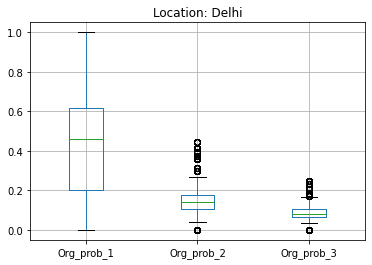

In [13]:
axes = data_Delhi.boxplot(column=['Org_prob_1','Org_prob_2','Org_prob_3'])
axes.set_title('Location: Delhi')
plt.savefig('Delhi_Boxplot', dpi = 144)

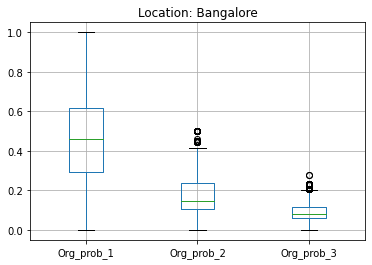

In [14]:
axes = data_Bangalore.boxplot(column=['Org_prob_1','Org_prob_2','Org_prob_3'])
axes.set_title('Location: Bangalore')
plt.savefig('Bangalore_Boxplot', dpi = 144)

In [15]:
axes =data_Nashik.boxplot(column=['Org_prob_1','Org_prob_2','Org_prob_3'])
axes.set_title('Location: Delhi')
plt.savefig('Delhi_Boxplot', dpi = 144)

NameError: name 'data_Nashik' is not defined

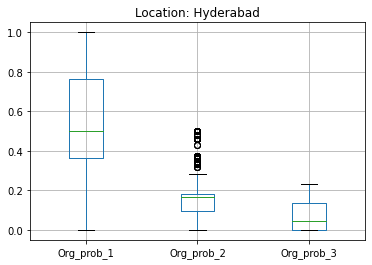

In [ ]:
axes = data_Bhubaneswar.boxplot(column=['Org_prob_1','Org_prob_2','Org_prob_3'])
axes.set_title('Location: Hyderabad')
plt.savefig('Hyderabad_Boxplot', dpi = 144)

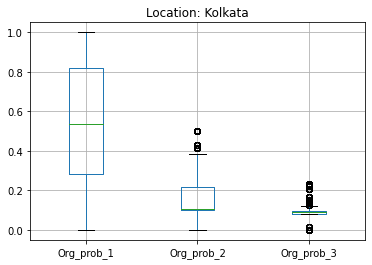

In [ ]:
axes = data_Kolkata.boxplot(column=['Org_prob_1','Org_prob_2','Org_prob_3'])
axes.set_title('Location: Kolkata')
plt.savefig('Kolkata_Boxplot', dpi = 144)

In [ ]:
# ax = sns.boxplot(hue="Sheet Name",data=data2['pred_proba_1','pred_proba_2','pred_proba_3'], palette="Set3")

# axes = data.boxplot(by="Sheet Name",column=['pred_proba_1','pred_proba_2','pred_proba_3'])
# axes.set_title('Location Wise')

In [238]:
#data2 = data[['AGE','GENDER','Ward Type','No of Days from Admission','Accuracy']]
#data2.head()

#data2['Ward Type'] = data2['Ward Type'].fillna(2)

In [17]:
data_Delhi["accuracy_correct"]

0        1
1        1
2        0
3        0
4        1
        ..
58884    1
58885    1
58886    1
58887    0
58888    1
Name: accuracy_correct, Length: 14866, dtype: int64

AUC ROC Score 0.5675393309405781
Confusion Matrix :
[[  21 1746]
 [  24 2669]]

sensitivity: 0.9910880059413294
specificity:  0.011884550084889643
Accuracy Score : 0.6031390134529148

Report : 
              precision    recall  f1-score   support

           0       0.47      0.01      0.02      1767
           1       0.60      0.99      0.75      2693

    accuracy                           0.60      4460
   macro avg       0.54      0.50      0.39      4460
weighted avg       0.55      0.60      0.46      4460






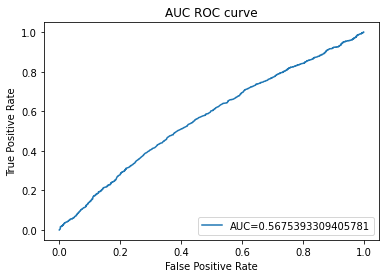

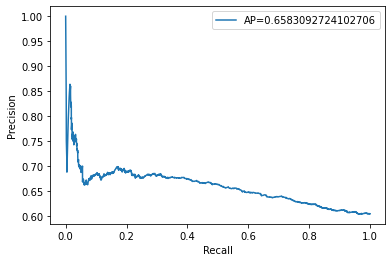

In [18]:
# data_Delhi

df = data_Delhi[['AGE','GENDER',"PATIENTSERVICE",'Ward Type','No of Days from Admission',"accuracy_correct"]]
#data2['Ward Type'] = data2['Ward Type'].fillna(2)
X_train = df.loc[:,~df.columns.isin(["accuracy_correct"])]
Y_train = df["accuracy_correct"]


X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state= 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
pred_proba

auc = auc = metrics.roc_auc_score(y_test, pred_proba)
print("AUC ROC Score",auc)
results = confusion_matrix(y_test, pred, labels=[0,1])
print ('Confusion Matrix :')
print(results) 
print("")
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity = tp/(tp+fn)
specificity = tn / (tn+fp)

print ('sensitivity:',sensitivity)
# print(sensitivity) 
print ('specificity: ',specificity)

print ('Accuracy Score :',accuracy_score(y_test, pred))
print("")
print('Report : ')
print (classification_report(y_test, pred))

print("")
print("")
print("")


# cat_4, cat_5 = train_test_split(cat2, test_size=0.01)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve")

plt.savefig('Delhi_AUC', dpi = 144)
plt.show()
print("")
print("")
print("")

average_precision = average_precision_score(y_test, pred_proba)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
# plot the model precision-recall curve
pyplot.plot(recall, precision,label="AP="+str(average_precision))
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
# plt.plot()
pyplot.legend()
# show the plot

pyplot.savefig('Delhi_PRC', dpi = 144)
pyplot.show()


AUC ROC Score 0.55058122672722
Confusion Matrix :
[[   2 2017]
 [   0 3243]]

sensitivity: 1.0
specificity:  0.0009905894006934125
Accuracy Score : 0.6166856708475865

Report : 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2019
           1       0.62      1.00      0.76      3243

    accuracy                           0.62      5262
   macro avg       0.81      0.50      0.38      5262
weighted avg       0.76      0.62      0.47      5262






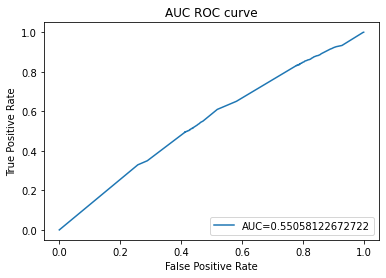

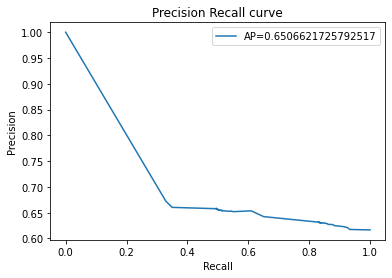

In [19]:
# data_Bangalore

data2 = data_Bangalore[['GENDER',"PATIENTSERVICE",'Ward Type','No of Days from Admission',"accuracy_correct"]]
#data2['Ward Type'] = data2['Ward Type'].fillna(2)
X_train = data2.loc[:,~data2.columns.isin(["accuracy_correct"])]
Y_train = data2["accuracy_correct"]


X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state= 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
pred_proba
print("")

auc = roc_auc_score(y_test, pred_proba)
print("AUC ROC Score",auc)
results = confusion_matrix(y_test, pred, labels=[0,1])
print ('Confusion Matrix :')
print(results) 
print("")
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity = tp/(tp+fn)
specificity = tn / (tn+fp)

print ('sensitivity:',sensitivity)
# print(sensitivity) 
print ('specificity: ',specificity)

print ('Accuracy Score :',accuracy_score(y_test, pred))
print("")
print('Report : ')
print (classification_report(y_test, pred))

print("")
print("")
print("")


# cat_4, cat_5 = train_test_split(cat2, test_size=0.01)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve");
plt.savefig('Bangalore_AUC', dpi = 144)
plt.show()

print("")
print("")
print("")

average_precision = average_precision_score(y_test, pred_proba)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
# plot the model precision-recall curve
pyplot.plot(recall, precision,label="AP="+str(average_precision))
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
plt.title("Precision Recall curve");
# show the legend
# plt.plot()
pyplot.legend()
# show the plot
pyplot.savefig('Bangalore_PRC', dpi = 144)
pyplot.show()

<ipython-input-20-36ec584503ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Ward Type'] = data2['Ward Type'].fillna(2)


AUC ROC Score 0.5582171553728975
Confusion Matrix :
[[ 66 296]
 [ 69 380]]

sensitivity: 0.8463251670378619
specificity:  0.18232044198895028
Accuracy Score : 0.5499383477188656

Report : 
              precision    recall  f1-score   support

           0       0.49      0.18      0.27       362
           1       0.56      0.85      0.68       449

    accuracy                           0.55       811
   macro avg       0.53      0.51      0.47       811
weighted avg       0.53      0.55      0.49       811






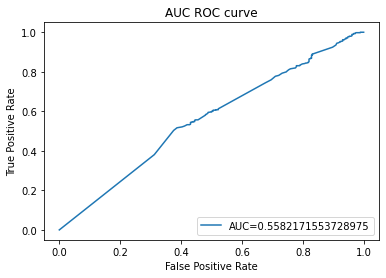

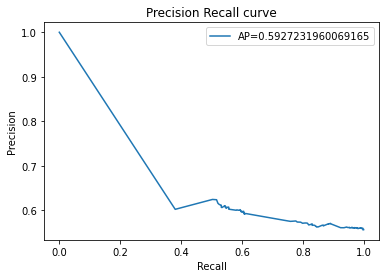

In [20]:
# data_Hyderabad

data2 = data_Bhubaneswar[['GENDER',"PATIENTSERVICE",'Ward Type','No of Days from Admission',"accuracy_correct"]]
data2['Ward Type'] = data2['Ward Type'].fillna(2)
X_train = data2.loc[:,~data2.columns.isin(["accuracy_correct"])]
Y_train = data2["accuracy_correct"]


X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state= 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
pred_proba

auc = metrics.roc_auc_score(y_test, pred_proba)
print("AUC ROC Score",auc)
results = confusion_matrix(y_test, pred, labels=[0,1])
print ('Confusion Matrix :')
print(results) 
print("")
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity = tp/(tp+fn)
specificity = tn / (tn+fp)

print ('sensitivity:',sensitivity)
# print(sensitivity) 
print ('specificity: ',specificity)

print ('Accuracy Score :',accuracy_score(y_test, pred))
print("")
print('Report : ')
print (classification_report(y_test, pred))

print("")
print("")
print("")


# cat_4, cat_5 = train_test_split(cat2, test_size=0.01)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve");
plt.savefig('Hyderabad_AUC', dpi = 144)
plt.show()

print("")
print("")
print("")

average_precision = average_precision_score(y_test, pred_proba)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
# plot the model precision-recall curve
pyplot.plot(recall, precision,label="AP="+str(average_precision))
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
plt.title("Precision Recall curve");
# show the legend
# plt.plot()
pyplot.legend()
# show the plot
pyplot.savefig('Hyderabad_PRC', dpi = 144)
pyplot.show()


AUC ROC Score 0.6211760072920625
Confusion Matrix :
[[  29 1318]
 [  31 2120]]

sensitivity: 0.9855880985588099
specificity:  0.021529324424647365
Accuracy Score : 0.6143510577472842

Report : 
              precision    recall  f1-score   support

           0       0.48      0.02      0.04      1347
           1       0.62      0.99      0.76      2151

    accuracy                           0.61      3498
   macro avg       0.55      0.50      0.40      3498
weighted avg       0.57      0.61      0.48      3498






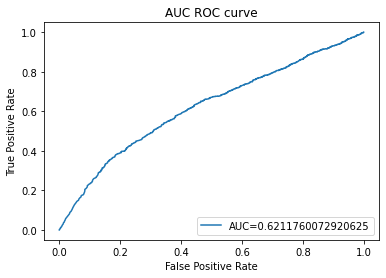

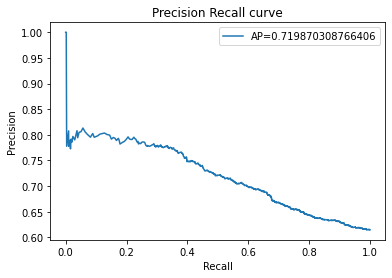

In [21]:
# data_Kolkata

data2 = data_Kolkata[["AGE",'GENDER',"PATIENTSERVICE",'Ward Type','No of Days from Admission',"accuracy_correct"]]
#data2['Ward Type'] = data2['Ward Type'].fillna(2)
X_train = data2.loc[:,~data2.columns.isin(["accuracy_correct"])]
Y_train = data2["accuracy_correct"]


X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state= 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
pred_proba
print("")
auc = auc = metrics.roc_auc_score(y_test, pred_proba)
print("AUC ROC Score",auc)
results = confusion_matrix(y_test, pred, labels=[0,1])
print ('Confusion Matrix :')
print(results) 
print("")
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity = tp/(tp+fn)
specificity = tn / (tn+fp)

print ('sensitivity:',sensitivity)
# print(sensitivity) 
print ('specificity: ',specificity)

print ('Accuracy Score :',accuracy_score(y_test, pred))
print("")
print('Report : ')
print (classification_report(y_test, pred))

print("")
print("")
print("")


# cat_4, cat_5 = train_test_split(cat2, test_size=0.01)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve");
plt.savefig('Kolkata_AUC', dpi = 144)
plt.show()

print("")
print("")
print("")

average_precision = average_precision_score(y_test, pred_proba)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
# plot the model precision-recall curve
pyplot.plot(recall, precision,label="AP="+str(average_precision))
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
plt.title("Precision Recall curve");
# show the legend
# plt.plot()
pyplot.legend()
pyplot.savefig('Kolkata_PRC', dpi = 144)
# show the plot
pyplot.show()


AUC ROC Score 0.5
Confusion Matrix :
[[   0 4373]
 [   0 6019]]

sensitivity: 1.0
specificity:  0.0
Accuracy Score : 0.5791955350269438

Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4373
           1       0.58      1.00      0.73      6019

    accuracy                           0.58     10392
   macro avg       0.29      0.50      0.37     10392
weighted avg       0.34      0.58      0.42     10392






C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


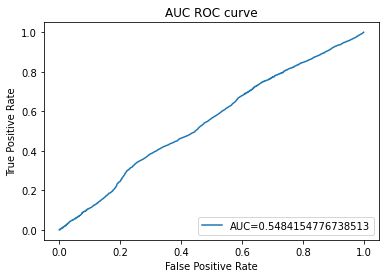

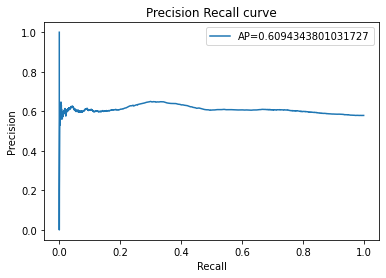

In [23]:

# data_Chennai

data2 = data_Chennai[['AGE','GENDER','Ward Type','No of Days from Admission','accuracy_correct']]
#data2['Ward Type'] = data2['Ward Type'].fillna(2)
X_train = data2.loc[:,~data2.columns.isin(['accuracy_correct'])]
Y_train = data2['accuracy_correct']


X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state= 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
pred_proba
print("")
auc = roc_auc_score(y_test, pred)
print("AUC ROC Score",auc)
results = confusion_matrix(y_test, pred, labels=[0,1])
print ('Confusion Matrix :')
print(results) 
print("")
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity = tp/(tp+fn)
specificity = tn / (tn+fp)

print ('sensitivity:',sensitivity)
# print(sensitivity) 
print ('specificity: ',specificity)

print ('Accuracy Score :',accuracy_score(y_test, pred))
print("")
print('Report : ')
print (classification_report(y_test, pred))

print("")
print("")
print("")


# cat_4, cat_5 = train_test_split(cat2, test_size=0.01)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve");
plt.savefig('Chennai_AUC', dpi = 144)
plt.show()

print("")
print("")
print("")

average_precision = average_precision_score(y_test, pred_proba)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
# plot the model precision-recall curve
pyplot.plot(recall, precision,label="AP="+str(average_precision))
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
plt.title("Precision Recall curve");
# plt.plot()
pyplot.legend()
# show the plot
pyplot.savefig('Chennai_PRC', dpi = 144)
pyplot.show()